<a href="https://colab.research.google.com/github/mrfaizahamed/Air-Quality-Index-Classification---By-using-Genetic-Algorithm/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deap

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/city_day.csv')
df.head(-1)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,Visakhapatnam,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


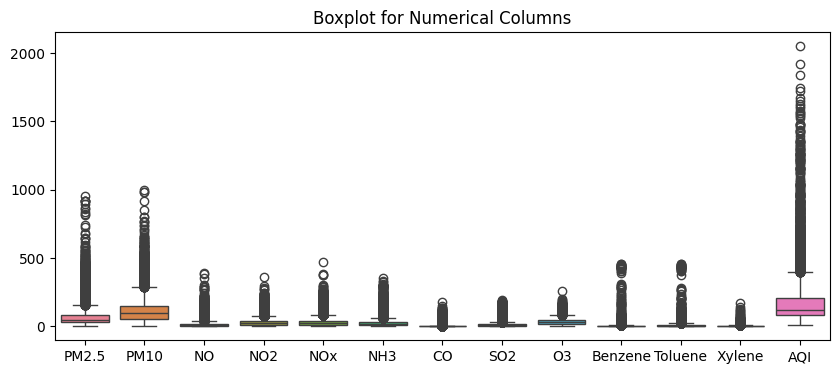

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.boxplot(data=df.drop(['City', 'Date', 'AQI_Bucket'], axis=1))
plt.title('Boxplot for Numerical Columns')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
data=df.dropna()
data.info()
print(data['AQI_Bucket'].unique())
data=data.drop('Xylene', axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6236 entries, 2123 to 29529
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        6236 non-null   object 
 1   Date        6236 non-null   object 
 2   PM2.5       6236 non-null   float64
 3   PM10        6236 non-null   float64
 4   NO          6236 non-null   float64
 5   NO2         6236 non-null   float64
 6   NOx         6236 non-null   float64
 7   NH3         6236 non-null   float64
 8   CO          6236 non-null   float64
 9   SO2         6236 non-null   float64
 10  O3          6236 non-null   float64
 11  Benzene     6236 non-null   float64
 12  Toluene     6236 non-null   float64
 13  Xylene      6236 non-null   float64
 14  AQI         6236 non-null   float64
 15  AQI_Bucket  6236 non-null   object 
dtypes: float64(13), object(3)
memory usage: 828.2+ KB
['Moderate' 'Poor' 'Very Poor' 'Satisfactory' 'Good' 'Severe']


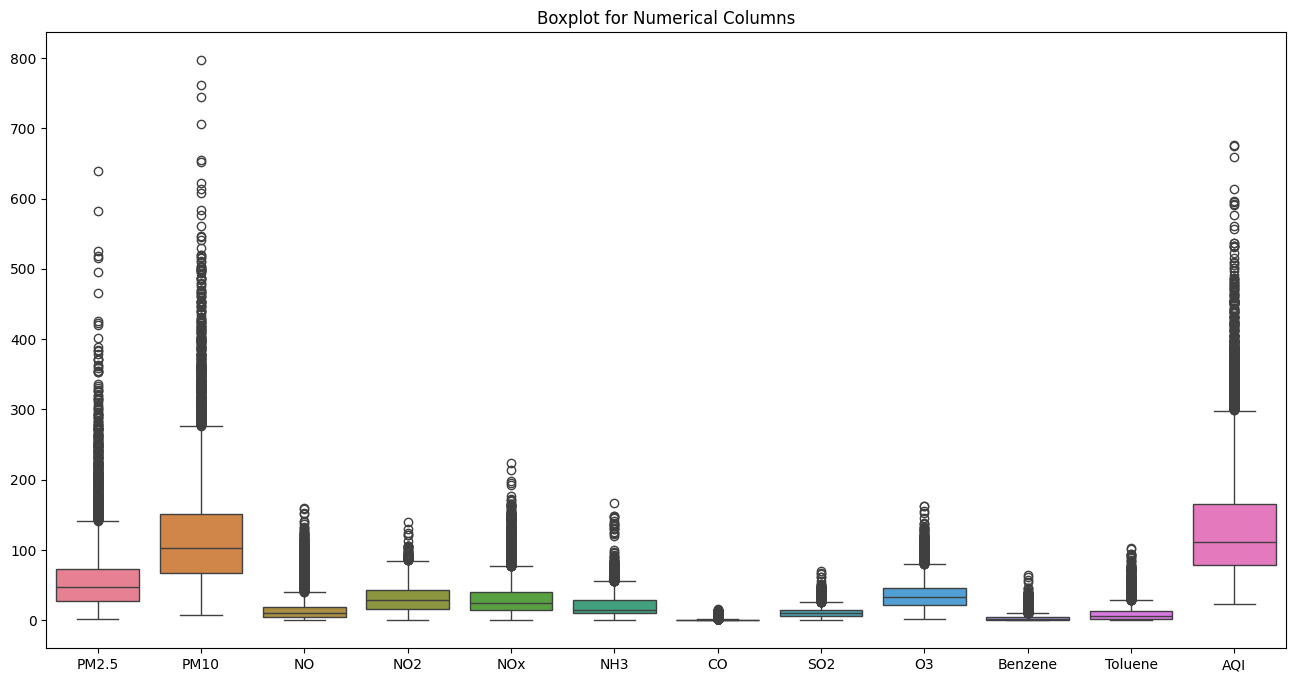

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.boxplot(data=data.drop(['City', 'Date', 'AQI_Bucket'], axis=1))
plt.title('Boxplot for Numerical Columns')
plt.show()

In [ ]:
print(data['City'].unique())

['Amaravati' 'Amritsar' 'Chandigarh' 'Delhi' 'Gurugram' 'Hyderabad'
 'Kolkata' 'Patna' 'Visakhapatnam']


In [ ]:
visakhapatnam_data = data[data['City'] == 'Visakhapatnam']

<ipython-input-49-81e8b1e025ad>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='AQI_Bucket', data=visakhapatnam_data, order=aqi_order.keys(), palette=[aqi_colors[x] for x in aqi_order.keys()])


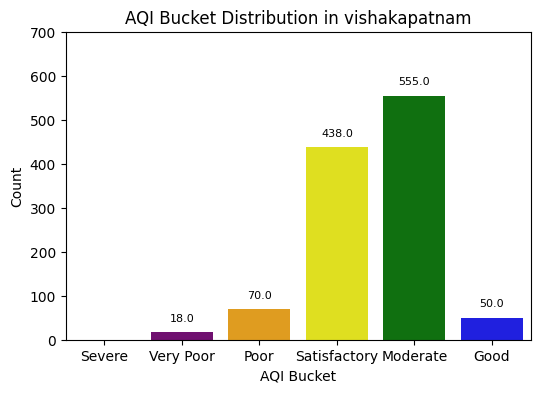

In [ ]:
aqi_order = {'Severe': 1, 'Very Poor': 2, 'Poor': 3, 'Satisfactory': 4, 'Moderate': 5, 'Good': 6}

# Define a custom color palette for each AQI bucket
aqi_colors = {'Severe': 'red', 'Very Poor': 'purple', 'Poor': 'orange',
              'Satisfactory': 'yellow', 'Moderate': 'green', 'Good': 'blue'}

# Plot the bar plot
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='AQI_Bucket', data=visakhapatnam_data, order=aqi_order.keys(), palette=[aqi_colors[x] for x in aqi_order.keys()])
# Adding count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
ax.set_ylim(0, 700)
plt.title('AQI Bucket Distribution in vishakapatnam')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import random

# Set a seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)

# Simple ELM Classifier implementation using NumPy
class ELMClassifier:
    def __init__(self, hid_num):
        self.hid_num = hid_num
        self.input_weights = None
        self.bias = None
        self.output_weights = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def rbf_kernel(self, x, center, gamma):
        x_expanded = np.expand_dims(x, axis=1)
        squared_diff = (x_expanded - center) ** 2
        sum_squared_diff = np.sum(squared_diff, axis=-1)
        rbf_result = np.exp(-gamma * sum_squared_diff)
        return rbf_result

    def fit(self, X, y):
        input_size = X.shape[1]
        self.input_weights = np.random.uniform(-1, 1, (self.hid_num, input_size))
        self.bias = np.random.uniform(-1, 1, (self.hid_num, 1))
        gamma = 1.0 / input_size
        hidden_output = self.rbf_kernel(X, self.input_weights, gamma)
        hidden_output_with_bias = hidden_output + self.bias.T

        # Convert y to one-hot encoding
        y_one_hot = np.eye(6)[y]

        # Calculate output weights using Moore-Penrose pseudo-inverse
        self.output_weights = np.linalg.pinv(hidden_output_with_bias.T @ hidden_output_with_bias) @ hidden_output_with_bias.T @ y_one_hot

    def predict(self, X):
        gamma = 1.0 / X.shape[1]
        hidden_output = self.rbf_kernel(X, self.input_weights, gamma)
        hidden_output_with_bias = hidden_output + self.bias.T

        # Calculate predicted probabilities for each class
        output_probabilities = hidden_output_with_bias @ self.output_weights

        # Convert probabilities to predicted class labels (0 to 5)
        predicted_labels = np.argmax(output_probabilities, axis=1)
        return predicted_labels

# Load the balanced dataset after applying SMOTE
X = visakhapatnam_data.drop(['City','Date','AQI_Bucket'], axis=1)
y = visakhapatnam_data['AQI_Bucket']

# Handle missing values
numeric_cols = X.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

# Replace 0 values with the mean of the respective columns
X = X.replace(0, X.mean())

# Convert AQI_Bucket to numerical labels
label_mapping = {'Severe': 0, 'Very Poor': 1, 'Poor': 2, 'Satisfactory': 3, 'Moderate': 4, 'Good': 5}
y_numeric = y.map(label_mapping)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_numeric, test_size=0.3, random_state=42)

# Define the Genetic Algorithm
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_gene", np.random.uniform, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_gene, n=12)

# Update evalOneMax function to handle classification
def evalOneMax(individual):
    individual = np.array(individual).reshape(1, -1)
    transformation_matrix = np.array(individual).reshape(12, 1)

    if transformation_matrix.shape[0] != X_train.shape[1]:
        print("Error: Transformation matrix dimensions are not compatible.")
        print("Transformation matrix shape:", transformation_matrix.shape)
        print("X_train shape:", X_train.shape)
        return 0,  # Return zero value in case of error

    transformation_matrix = transformation_matrix.T
    X_train_transformed = X_train @ transformation_matrix.T
    X_test_transformed = X_test @ transformation_matrix.T

    if X_train_transformed.shape[1] != 1 or X_test_transformed.shape[1] != 1:
        print("Error: Output shapes after transformation are not correct.")
        print("X_train_transformed shape:", X_train_transformed.shape)
        print("X_test_transformed shape:", X_test_transformed.shape)
        return 0,  # Return zero value in case of error

    elm_classifier = ELMClassifier(hid_num=75)
    elm_classifier.fit(X_train_transformed, y_train)
    y_pred_train = elm_classifier.predict(X_train_transformed)
    y_pred_test = elm_classifier.predict(X_test_transformed)

    accuracy = accuracy_score(y_test, y_pred_test)

    fitness_value = accuracy
    return fitness_value,

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)



# Convergence threshold for the genetic algorithm
CONVERGENCE_THRESHOLD = 0.6
pop=toolbox.population(n=100)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

hof = tools.HallOfFame(1)


# Define the convergence criteria
def convergence_criterion(logbook, threshold):
    fits = [logbook[i]['max'] for i in range(len(logbook))]
    return max(fits) >= threshold
# Run the GA with early stopping
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.3, ngen=50, stats=stats, halloffame=hof, verbose=True)

# Check convergence
if convergence_criterion(log, CONVERGENCE_THRESHOLD):
    print(f"Convergence achieved with threshold {CONVERGENCE_THRESHOLD}.")

# Use the best individual for final evaluation
best_individual = hof[0]
best_transformation_matrix = np.array(best_individual).reshape(1, -1)

if best_transformation_matrix.shape[1] != X_scaled.shape[1]:
    print("Error: Transformation matrix dimensions are not compatible.")
else:
    X_scaled_transformed = X_scaled @ best_transformation_matrix.T
    final_elm_classifier = ELMClassifier(hid_num=75)
    final_elm_classifier.fit(X_scaled_transformed, y_numeric)
    y_pred_final = final_elm_classifier.predict(X_scaled_transformed)

    # Continue with your evaluation metrics and final analysis...
    final_accuracy_1 = accuracy_score(y_numeric, y_pred_final)
    final_precision_1 = precision_score(y_numeric, y_pred_final, average='weighted', zero_division=1)
    final_recall_1 = recall_score(y_numeric, y_pred_final, average='weighted')

    print("Final Accuracy:", final_accuracy_1)
    print("Final Precision:", final_precision_1)
    print("Final Recall:", final_recall_1)


gen	nevals	avg     	std      	min     	max     
0  	100   	0.536412	0.0574649	0.452941	0.726471
1  	74    	0.565941	0.0565352	0.438235	0.741176
2  	61    	0.582647	0.0645057	0.432353	0.741176
3  	74    	0.603559	0.0656315	0.458824	0.729412
4  	79    	0.624265	0.0602509	0.494118	0.770588
5  	53    	0.652353	0.0608475	0.45    	0.767647
6  	61    	0.666471	0.0619758	0.479412	0.782353
7  	70    	0.674176	0.0693302	0.473529	0.770588
8  	77    	0.681059	0.0690473	0.476471	0.773529
9  	72    	0.698059	0.072926 	0.464706	0.779412
10 	68    	0.718912	0.0656024	0.482353	0.779412
11 	66    	0.7345  	0.0546218	0.544118	0.797059
12 	78    	0.736441	0.0622417	0.511765	0.8     
13 	74    	0.743794	0.0590245	0.491176	0.808824
14 	64    	0.756794	0.0610671	0.497059	0.814706
15 	81    	0.751941	0.0723257	0.511765	0.823529
16 	67    	0.761029	0.0760126	0.488235	0.844118
17 	65    	0.774147	0.0772363	0.473529	0.852941
18 	71    	0.790324	0.0696386	0.502941	0.852941
19 	63    	0.801971	0.0709379	0.511765	0

In [ ]:
Delhi_data = data[data['City'] == 'Delhi']

<ipython-input-50-d162a37fe236>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='AQI_Bucket', data=Delhi_data, order=aqi_order.keys(), palette=[aqi_colors[x] for x in aqi_order.keys()])


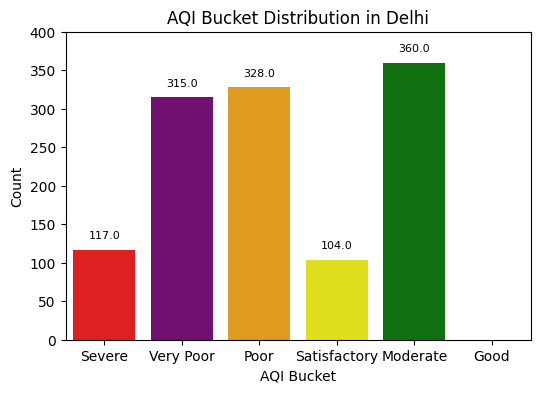

In [ ]:
aqi_order = {'Severe': 1, 'Very Poor': 2, 'Poor': 3, 'Satisfactory': 4, 'Moderate': 5, 'Good': 6}

# Define a custom color palette for each AQI bucket
aqi_colors = {'Severe': 'red', 'Very Poor': 'purple', 'Poor': 'orange',
              'Satisfactory': 'yellow', 'Moderate': 'green', 'Good': 'blue'}

# Plot the bar plot
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='AQI_Bucket', data=Delhi_data, order=aqi_order.keys(), palette=[aqi_colors[x] for x in aqi_order.keys()])
# Adding count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
ax.set_ylim(0, 400)
plt.title('AQI Bucket Distribution in Delhi')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import random

# Set a seed for reproducibility
seed = 30
random.seed(seed)
np.random.seed(seed)

# Simple ELM Classifier implementation using NumPy
class ELMClassifier:
    def __init__(self, hid_num):
        self.hid_num = hid_num
        self.input_weights = None
        self.bias = None
        self.output_weights = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def rbf_kernel(self, x, center, gamma):
        x_expanded = np.expand_dims(x, axis=1)
        squared_diff = (x_expanded - center) ** 2
        sum_squared_diff = np.sum(squared_diff, axis=-1)
        rbf_result = np.exp(-gamma * sum_squared_diff)
        return rbf_result

    def fit(self, X, y):
        input_size = X.shape[1]
        self.input_weights = np.random.uniform(-1, 1, (self.hid_num, input_size))
        self.bias = np.random.uniform(-1, 1, (self.hid_num, 1))
        gamma = 1.0 / input_size
        hidden_output = self.rbf_kernel(X, self.input_weights, gamma)
        hidden_output_with_bias = hidden_output + self.bias.T

        # Convert y to one-hot encoding
        y_one_hot = np.eye(6)[y]

        # Calculate output weights using Moore-Penrose pseudo-inverse
        self.output_weights = np.linalg.pinv(hidden_output_with_bias.T @ hidden_output_with_bias) @ hidden_output_with_bias.T @ y_one_hot

    def predict(self, X):
        gamma = 1.0 / X.shape[1]
        hidden_output = self.rbf_kernel(X, self.input_weights, gamma)
        hidden_output_with_bias = hidden_output + self.bias.T

        # Calculate predicted probabilities for each class
        output_probabilities = hidden_output_with_bias @ self.output_weights

        # Convert probabilities to predicted class labels (0 to 5)
        predicted_labels = np.argmax(output_probabilities, axis=1)
        return predicted_labels


# Preprocess the dataset
X = Delhi_data.drop(['City', 'Date', 'AQI_Bucket'], axis=1)
y = Delhi_data['AQI_Bucket']

# Handle missing values
numeric_cols = X.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

# Replace 0 values with the mean of the respective columns
X = X.replace(0, X.mean())

# Convert AQI_Bucket to numerical labels
label_mapping = {'Severe': 0, 'Very Poor': 1, 'Poor': 2, 'Satisfactory': 3, 'Moderate': 4, 'Good': 5}
y_numeric = y.map(label_mapping)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_numeric, test_size=0.3, random_state=42)

# Define the Genetic Algorithm
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_gene", np.random.uniform, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_gene, n=12)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Update evalOneMax function to handle classification
def evalOneMax(individual):
    individual = np.array(individual).reshape(1, -1)
    transformation_matrix = np.array(individual).reshape(12, 1)

    if transformation_matrix.shape[0] != X_train.shape[1]:
        print("Error: Transformation matrix dimensions are not compatible.")
        print("Transformation matrix shape:", transformation_matrix.shape)
        print("X_train shape:", X_train.shape)
        return 0,  # Return zero value in case of error

    transformation_matrix = transformation_matrix.T
    X_train_transformed = X_train @ transformation_matrix.T
    X_test_transformed = X_test @ transformation_matrix.T

    if X_train_transformed.shape[1] != 1 or X_test_transformed.shape[1] != 1:
        print("Error: Output shapes after transformation are not correct.")
        print("X_train_transformed shape:", X_train_transformed.shape)
        print("X_test_transformed shape:", X_test_transformed.shape)
        return 0,  # Return zero value in case of error

    elm_classifier = ELMClassifier(hid_num=75)
    elm_classifier.fit(X_train_transformed, y_train)
    y_pred_train = elm_classifier.predict(X_train_transformed)
    y_pred_test = elm_classifier.predict(X_test_transformed)

    accuracy = accuracy_score(y_test, y_pred_test)

    fitness_value = accuracy
    return fitness_value,

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the GA
CONVERGENCE_THRESHOLD = 0.6
pop=toolbox.population(n=100)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

hof = tools.HallOfFame(1)


# Define the convergence criteria
def convergence_criterion(logbook, threshold):
    fits = [logbook[i]['max'] for i in range(len(logbook))]
    return max(fits) >= threshold
# Run the GA with early stopping
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.3, ngen=50, stats=stats, halloffame=hof, verbose=True)

# Check convergence
if convergence_criterion(log, CONVERGENCE_THRESHOLD):
    print(f"Convergence achieved with threshold {CONVERGENCE_THRESHOLD}.")

# Use the best individual for final evaluation
best_individual = hof[0]
best_transformation_matrix = np.array(best_individual).reshape(1, -1)

if best_transformation_matrix.shape[1] != X_scaled.shape[1]:
    print("Error: Transformation matrix dimensions are not compatible.")
else:
    X_scaled_transformed = X_scaled @ best_transformation_matrix.T
    final_elm_classifier = ELMClassifier(hid_num=75)
    final_elm_classifier.fit(X_scaled_transformed, y_numeric)
    y_pred_final = final_elm_classifier.predict(X_scaled_transformed)

    # Continue with your evaluation metrics and final analysis...
    final_accuracy_2 = accuracy_score(y_numeric, y_pred_final)
    final_precision_2 = precision_score(y_numeric, y_pred_final, average='weighted', zero_division=1)
    final_recall_2 = recall_score(y_numeric, y_pred_final, average='weighted')

    print("Final Accuracy:", final_accuracy_2)
    print("Final Precision:", final_precision_2)
    print("Final Recall:", final_recall_2)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	std      	min     	max    
0  	100   	0.456413	0.0732829	0.345109	0.67663
1  	58    	0.50644 	0.0743063	0.350543	0.752717
2  	68    	0.549538	0.072827 	0.347826	0.690217
3  	69    	0.574728	0.0795333	0.320652	0.695652
4  	75    	0.605136	0.080746 	0.350543	0.722826
5  	74    	0.607147	0.0981293	0.347826	0.76087 
6  	65    	0.633478	0.0943708	0.388587	0.796196
7  	69    	0.665   	0.0857182	0.366848	0.809783
8  	78    	0.670571	0.094188 	0.394022	0.828804
9  	80    	0.697283	0.109796 	0.36413 	0.828804
10 	64    	0.723098	0.107369 	0.402174	0.82337 
11 	70    	0.755924	0.0831934	0.44837 	0.82337 
12 	72    	0.780978	0.0694898	0.423913	0.834239
13 	70    	0.77856 	0.0816444	0.407609	0.855978
14 	73    	0.793723	0.0684277	0.361413	0.855978
15 	85    	0.778152	0.093931 	0.366848	0.86413 
16 	76    	0.792201	0.0820251	0.440217	0.86413 
17 	75    	0.791984	0.0907571	0.418478	0.86413 
18 	74    	0.792337	0.100674 	0.369565	0.866848
19 	74    	0.806386	0.0934572	0.464674	0.8

In [ ]:
Hyderabad_data = data[data['City'] == 'Hyderabad']

<ipython-input-54-0dbc62f5f634>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='AQI_Bucket', data=Hyderabad_data, order=aqi_order.keys(), palette=[aqi_colors[x] for x in aqi_order.keys()])


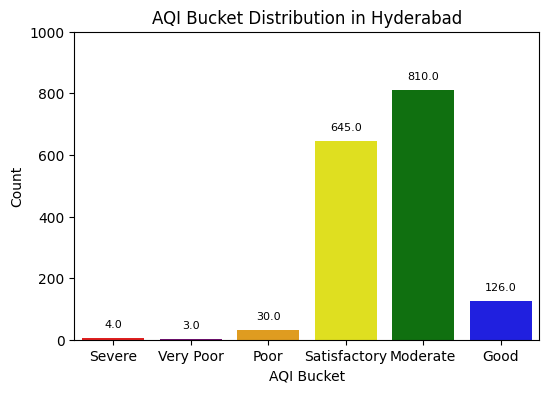

In [ ]:
aqi_order = {'Severe': 1, 'Very Poor': 2, 'Poor': 3, 'Satisfactory': 4, 'Moderate': 5, 'Good': 6}

# Define a custom color palette for each AQI bucket
aqi_colors = {'Severe': 'red', 'Very Poor': 'purple', 'Poor': 'orange',
              'Satisfactory': 'yellow', 'Moderate': 'green', 'Good': 'blue'}

# Plot the bar plot
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='AQI_Bucket', data=Hyderabad_data, order=aqi_order.keys(), palette=[aqi_colors[x] for x in aqi_order.keys()])
# Adding count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
ax.set_ylim(0, 1000)
plt.title('AQI Bucket Distribution in Hyderabad')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import random

# Set a seed for reproducibility
seed = 30
random.seed(seed)
np.random.seed(seed)

# Simple ELM Classifier implementation using NumPy
class ELMClassifier:
    def __init__(self, hid_num):
        self.hid_num = hid_num
        self.input_weights = None
        self.bias = None
        self.output_weights = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def rbf_kernel(self, x, center, gamma):
        x_expanded = np.expand_dims(x, axis=1)
        squared_diff = (x_expanded - center) ** 2
        sum_squared_diff = np.sum(squared_diff, axis=-1)
        rbf_result = np.exp(-gamma * sum_squared_diff)
        return rbf_result

    def fit(self, X, y):
        input_size = X.shape[1]
        self.input_weights = np.random.uniform(-1, 1, (self.hid_num, input_size))
        self.bias = np.random.uniform(-1, 1, (self.hid_num, 1))
        gamma = 1.0 / input_size
        hidden_output = self.rbf_kernel(X, self.input_weights, gamma)
        hidden_output_with_bias = hidden_output + self.bias.T

        # Convert y to one-hot encoding
        y_one_hot = np.eye(6)[y]

        # Calculate output weights using Moore-Penrose pseudo-inverse
        self.output_weights = np.linalg.pinv(hidden_output_with_bias.T @ hidden_output_with_bias) @ hidden_output_with_bias.T @ y_one_hot

    def predict(self, X):
        gamma = 1.0 / X.shape[1]
        hidden_output = self.rbf_kernel(X, self.input_weights, gamma)
        hidden_output_with_bias = hidden_output + self.bias.T

        # Calculate predicted probabilities for each class
        output_probabilities = hidden_output_with_bias @ self.output_weights

        # Convert probabilities to predicted class labels (0 to 5)
        predicted_labels = np.argmax(output_probabilities, axis=1)
        return predicted_labels

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
# visakhapatnam_data = pd.read_csv('your_dataset.csv')

# Preprocess the dataset
X = Hyderabad_data.drop(['City', 'Date', 'AQI_Bucket'], axis=1)
y = Hyderabad_data['AQI_Bucket']

# Handle missing values
numeric_cols = X.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

# Replace 0 values with the mean of the respective columns
X = X.replace(0, X.mean())

# Convert AQI_Bucket to numerical labels
label_mapping = {'Severe': 0, 'Very Poor': 1, 'Poor': 2, 'Satisfactory': 3, 'Moderate': 4, 'Good': 5}
y_numeric = y.map(label_mapping)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_numeric, test_size=0.3, random_state=42)

# Define the Genetic Algorithm
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_gene", np.random.uniform, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_gene, n=12)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Update evalOneMax function to handle classification
def evalOneMax(individual):
    individual = np.array(individual).reshape(1, -1)
    transformation_matrix = np.array(individual).reshape(12, 1)

    if transformation_matrix.shape[0] != X_train.shape[1]:
        print("Error: Transformation matrix dimensions are not compatible.")
        print("Transformation matrix shape:", transformation_matrix.shape)
        print("X_train shape:", X_train.shape)
        return 0,  # Return zero value in case of error

    transformation_matrix = transformation_matrix.T
    X_train_transformed = X_train @ transformation_matrix.T
    X_test_transformed = X_test @ transformation_matrix.T

    if X_train_transformed.shape[1] != 1 or X_test_transformed.shape[1] != 1:
        print("Error: Output shapes after transformation are not correct.")
        print("X_train_transformed shape:", X_train_transformed.shape)
        print("X_test_transformed shape:", X_test_transformed.shape)
        return 0,  # Return zero value in case of error

    elm_classifier = ELMClassifier(hid_num=75)
    elm_classifier.fit(X_train_transformed, y_train)
    y_pred_train = elm_classifier.predict(X_train_transformed)
    y_pred_test = elm_classifier.predict(X_test_transformed)

    accuracy = accuracy_score(y_test, y_pred_test)

    fitness_value = accuracy
    return fitness_value,

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the GA
CONVERGENCE_THRESHOLD = 0.6
pop=toolbox.population(n=100)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

hof = tools.HallOfFame(1)


# Define the convergence criteria
def convergence_criterion(logbook, threshold):
    fits = [logbook[i]['max'] for i in range(len(logbook))]
    return max(fits) >= threshold
# Run the GA with early stopping
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.3, ngen=50, stats=stats, halloffame=hof, verbose=True)

# Check convergence
if convergence_criterion(log, CONVERGENCE_THRESHOLD):
    print(f"Convergence achieved with threshold {CONVERGENCE_THRESHOLD}.")

# Use the best individual for final evaluation
best_individual = hof[0]
best_transformation_matrix = np.array(best_individual).reshape(1, -1)

if best_transformation_matrix.shape[1] != X_scaled.shape[1]:
    print("Error: Transformation matrix dimensions are not compatible.")
else:
    X_scaled_transformed = X_scaled @ best_transformation_matrix.T
    final_elm_classifier = ELMClassifier(hid_num=75)
    final_elm_classifier.fit(X_scaled_transformed, y_numeric)
    y_pred_final = final_elm_classifier.predict(X_scaled_transformed)

    # Continue with your evaluation metrics and final analysis...
    final_accuracy_3 = accuracy_score(y_numeric, y_pred_final)
    final_precision_3 = precision_score(y_numeric, y_pred_final, average='weighted', zero_division=1)
    final_recall_3 = recall_score(y_numeric, y_pred_final, average='weighted')

    print("Final Accuracy:", final_accuracy_3)
    print("Final Precision:", final_precision_3)
    print("Final Recall:", final_recall_3)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	std      	min	max     
0  	100   	0.632593	0.0676728	0.5	0.812757
1  	58    	0.679465	0.0663577	0.518519	0.812757
2  	68    	0.710823	0.066705 	0.530864	0.823045
3  	69    	0.727119	0.0777221	0.483539	0.82716 
4  	75    	0.769033	0.069076 	0.537037	0.855967
5  	74    	0.787984	0.0548746	0.563786	0.876543
6  	65    	0.796831	0.0549422	0.600823	0.880658
7  	69    	0.819918	0.0421328	0.582305	0.880658
8  	78    	0.823621	0.0523055	0.534979	0.882716
9  	80    	0.844074	0.0404074	0.639918	0.882716
10 	64    	0.846049	0.0496072	0.631687	0.884774
11 	70    	0.852325	0.0563755	0.578189	0.890947
12 	72    	0.867016	0.0404714	0.652263	0.890947
13 	70    	0.858807	0.0582844	0.569959	0.890947
14 	73    	0.866317	0.0472512	0.613169	0.890947
15 	85    	0.860103	0.0512577	0.641975	0.890947
16 	76    	0.855   	0.0656559	0.596708	0.890947
17 	75    	0.86177 	0.0576436	0.59465 	0.890947
18 	74    	0.851687	0.0708128	0.582305	0.895062
19 	74    	0.858663	0.0628389	0.555556	0.895062
20

In [ ]:
Patna_data = data[data['City'] == 'Patna']
Patna_data.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
25531,Patna,2019-12-24,242.58,158.08,8.62,42.92,47.85,49.80,2.75,10.66,33.28,3.79,8.30,449.0,Severe
25532,Patna,2019-12-25,151.31,198.02,21.11,31.33,43.25,49.83,1.47,8.33,14.76,2.84,1.49,336.0,Very Poor
25533,Patna,2019-12-26,123.41,165.55,19.81,22.25,39.17,45.50,1.20,8.66,17.65,2.68,1.24,288.0,Poor
25534,Patna,2019-12-27,124.26,161.09,18.73,34.37,49.02,39.66,1.13,7.04,16.89,2.19,1.02,256.0,Poor
25535,Patna,2019-12-28,164.46,209.11,19.61,32.19,49.18,32.82,1.38,7.62,11.68,3.89,0.98,298.0,Poor
25536,Patna,2019-12-29,161.92,208.07,20.62,29.77,48.57,25.25,1.42,8.13,13.67,3.20,0.87,331.0,Very Poor
25537,Patna,2019-12-30,188.15,232.98,31.10,34.50,64.26,27.59,1.81,8.64,13.74,3.23,1.38,333.0,Very Poor
25538,Patna,2019-12-31,195.81,246.00,46.50,36.69,82.49,28.80,2.41,7.45,15.66,4.76,1.74,364.0,Very Poor
25539,Patna,2020-01-01,214.23,271.06,45.23,36.74,81.09,27.28,2.71,7.99,16.47,4.49,2.17,364.0,Very Poor
25540,Patna,2020-01-02,207.20,269.10,46.55,35.29,78.83,31.46,3.03,9.22,16.96,7.08,3.16,372.0,Very Poor


<ipython-input-58-e225694465ac>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='AQI_Bucket', data=Patna_data, order=aqi_order.keys(), palette=[aqi_colors[x] for x in aqi_order.keys()])


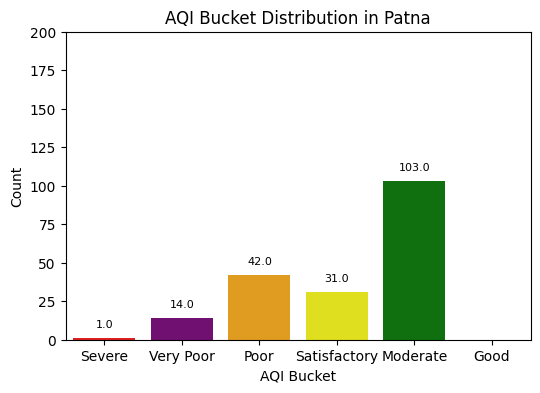

In [ ]:
aqi_order = {'Severe': 1, 'Very Poor': 2, 'Poor': 3, 'Satisfactory': 4, 'Moderate': 5, 'Good': 6}

# Define a custom color palette for each AQI bucket
aqi_colors = {'Severe': 'red', 'Very Poor': 'purple', 'Poor': 'orange',
              'Satisfactory': 'yellow', 'Moderate': 'green', 'Good': 'blue'}

# Plot the bar plot
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='AQI_Bucket', data=Patna_data, order=aqi_order.keys(), palette=[aqi_colors[x] for x in aqi_order.keys()])
# Adding count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
ax.set_ylim(0, 200)
plt.title('AQI Bucket Distribution in Patna')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import random

# Set a seed for reproducibility
seed = 30
random.seed(seed)
np.random.seed(seed)

# Simple ELM Classifier implementation using NumPy
class ELMClassifier:
    def __init__(self, hid_num):
        self.hid_num = hid_num
        self.input_weights = None
        self.bias = None
        self.output_weights = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def rbf_kernel(self, x, center, gamma):
        x_expanded = np.expand_dims(x, axis=1)
        squared_diff = (x_expanded - center) ** 2
        sum_squared_diff = np.sum(squared_diff, axis=-1)
        rbf_result = np.exp(-gamma * sum_squared_diff)
        return rbf_result

    def fit(self, X, y):
        input_size = X.shape[1]
        self.input_weights = np.random.uniform(-1, 1, (self.hid_num, input_size))
        self.bias = np.random.uniform(-1, 1, (self.hid_num, 1))
        gamma = 1.0 / input_size
        hidden_output = self.rbf_kernel(X, self.input_weights, gamma)
        hidden_output_with_bias = hidden_output + self.bias.T

        # Convert y to one-hot encoding
        y_one_hot = np.eye(6)[y]

        # Calculate output weights using Moore-Penrose pseudo-inverse
        self.output_weights = np.linalg.pinv(hidden_output_with_bias.T @ hidden_output_with_bias) @ hidden_output_with_bias.T @ y_one_hot

    def predict(self, X):
        gamma = 1.0 / X.shape[1]
        hidden_output = self.rbf_kernel(X, self.input_weights, gamma)
        hidden_output_with_bias = hidden_output + self.bias.T

        # Calculate predicted probabilities for each class
        output_probabilities = hidden_output_with_bias @ self.output_weights

        # Convert probabilities to predicted class labels (0 to 5)
        predicted_labels = np.argmax(output_probabilities, axis=1)
        return predicted_labels

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
# visakhapatnam_data = pd.read_csv('your_dataset.csv')

# Preprocess the dataset
X = Patna_data.drop(['City', 'Date', 'AQI_Bucket'], axis=1)
y = Patna_data['AQI_Bucket']

# Handle missing values
numeric_cols = X.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

# Replace 0 values with the mean of the respective columns
X = X.replace(0, X.mean())

# Convert AQI_Bucket to numerical labels
label_mapping = {'Severe': 0, 'Very Poor': 1, 'Poor': 2, 'Satisfactory': 3, 'Moderate': 4, 'Good': 5}
y_numeric = y.map(label_mapping)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_numeric, test_size=0.3, random_state=42)

# Define the Genetic Algorithm
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_gene", np.random.uniform, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_gene, n=12)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Update evalOneMax function to handle classification
def evalOneMax(individual):
    individual = np.array(individual).reshape(1, -1)
    transformation_matrix = np.array(individual).reshape(12, 1)

    if transformation_matrix.shape[0] != X_train.shape[1]:
        print("Error: Transformation matrix dimensions are not compatible.")
        print("Transformation matrix shape:", transformation_matrix.shape)
        print("X_train shape:", X_train.shape)
        return 0,  # Return zero value in case of error

    transformation_matrix = transformation_matrix.T
    X_train_transformed = X_train @ transformation_matrix.T
    X_test_transformed = X_test @ transformation_matrix.T

    if X_train_transformed.shape[1] != 1 or X_test_transformed.shape[1] != 1:
        print("Error: Output shapes after transformation are not correct.")
        print("X_train_transformed shape:", X_train_transformed.shape)
        print("X_test_transformed shape:", X_test_transformed.shape)
        return 0,  # Return zero value in case of error

    elm_classifier = ELMClassifier(hid_num=75)
    elm_classifier.fit(X_train_transformed, y_train)
    y_pred_train = elm_classifier.predict(X_train_transformed)
    y_pred_test = elm_classifier.predict(X_test_transformed)

    accuracy = accuracy_score(y_test, y_pred_test)

    fitness_value = accuracy
    return fitness_value,

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the GA
CONVERGENCE_THRESHOLD = 0.6
pop=toolbox.population(n=100)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

hof = tools.HallOfFame(1)


# Define the convergence criteria
def convergence_criterion(logbook, threshold):
    fits = [logbook[i]['max'] for i in range(len(logbook))]
    return max(fits) >= threshold
# Run the GA with early stopping
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.3, ngen=50, stats=stats, halloffame=hof, verbose=True)

# Check convergence
if convergence_criterion(log, CONVERGENCE_THRESHOLD):
    print(f"Convergence achieved with threshold {CONVERGENCE_THRESHOLD}.")

# Use the best individual for final evaluation
best_individual = hof[0]
best_transformation_matrix = np.array(best_individual).reshape(1, -1)

if best_transformation_matrix.shape[1] != X_scaled.shape[1]:
    print("Error: Transformation matrix dimensions are not compatible.")
else:
    X_scaled_transformed = X_scaled @ best_transformation_matrix.T
    final_elm_classifier = ELMClassifier(hid_num=75)
    final_elm_classifier.fit(X_scaled_transformed, y_numeric)
    y_pred_final = final_elm_classifier.predict(X_scaled_transformed)

    # Continue with your evaluation metrics and final analysis...
    final_accuracy_4 = accuracy_score(y_numeric, y_pred_final)
    final_precision_4 = precision_score(y_numeric, y_pred_final, average='weighted', zero_division=1)
    final_recall_4 = recall_score(y_numeric, y_pred_final, average='weighted')

    print("Final Accuracy:", final_accuracy_4)
    print("Final Precision:", final_precision_4)
    print("Final Recall:", final_recall_4)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	std      	min     	max     
0  	100   	0.578276	0.0663925	0.448276	0.741379
1  	58    	0.612414	0.0675493	0.431034	0.741379
2  	68    	0.647759	0.0799545	0.448276	0.862069
3  	69    	0.66    	0.0814582	0.465517	0.862069
4  	75    	0.69069 	0.0831464	0.448276	0.862069
5  	74    	0.697069	0.0883275	0.431034	0.862069
6  	65    	0.703103	0.0964464	0.37931 	0.862069
7  	69    	0.728966	0.0922399	0.431034	0.862069
8  	78    	0.74569 	0.0858744	0.517241	0.87931 
9  	80    	0.767759	0.0789894	0.5     	0.87931 
10 	64    	0.761379	0.108572 	0.431034	0.87931 
11 	70    	0.783448	0.0952286	0.5     	0.896552
12 	72    	0.818793	0.0816919	0.465517	0.87931 
13 	70    	0.825345	0.0829615	0.5     	0.87931 
14 	73    	0.840345	0.0690353	0.5     	0.87931 
15 	85    	0.829828	0.0801921	0.517241	0.896552
16 	76    	0.818448	0.092252 	0.482759	0.896552
17 	75    	0.825   	0.0881631	0.517241	0.896552
18 	74    	0.818103	0.0932111	0.482759	0.913793
19 	74    	0.825172	0.0979583	0.482759	0

In [ ]:
print("Final Accuracy:", final_accuracy_1)
print("Final Accuracy:", final_accuracy_2)
print("Final Accuracy:", final_accuracy_3)
print("Final Accuracy:", final_accuracy_4)

Final Accuracy: 0.8390804597701149
Final Accuracy: 0.8831699346405228
Final Accuracy: 0.8708281829419036
Final Accuracy: 0.8691099476439791


In [ ]:
print("Final Precision:", final_precision_1)
print("Final Precision:", final_precision_2)
print("Final Precision:", final_precision_3)
print("Final Precision:", final_precision_4)

Final Precision: 0.8508111682846826
Final Precision: 0.8839024488300615
Final Precision: 0.8736963973267615
Final Precision: 0.8789005754878274


In [ ]:
print("Final Recall:", final_recall_1)
print("Final Recall:", final_recall_2)
print("Final Recall:", final_recall_3)
print("Final Recall:", final_recall_4)

Final Recall: 0.8390804597701149
Final Recall: 0.8831699346405228
Final Recall: 0.8708281829419036
Final Recall: 0.8691099476439791
